Jobins Jose

DTSC - 691


Developing the model

Jupyter Notebook Code

PROJECT OVERVIEW

The project aims to build a ML project that accurately predicts individual medical insurance costs based on demographic and health related data. It will simulate a real-world insurance pricing use case which will help to make an accurate and fair premium estimation.

The project begins with exploratory data analysis (EDA) to understand the structure, distribution, and key characteristics of the dataset. This step includes visualizing features, identifying missing values or outliers, and examining relationships between variables.

Following EDA, the data is cleaned and preprocessed using a robust pipeline. This pipeline handles numerical and categorical features which are separately scaled and encoded, ensuring consistency throughout the modeling process.

Next, four machine learning models are trained: Linear Regression, Random Forest Regressor, XGBoost Regressor, and MLP Regressor. To optimize performance, hyperparameter tuning is performed using GridSearchCV . The models are then evaluated using standard regression metrics:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R-squared (R²)

Based on performance, the best-performing model is selected and further evaluated using advanced techniques. These include:

Residual plots to detect patterns or heteroscedasticity

Actual vs. Predicted plots to assess fit quality

SHAP (SHapley Additive exPlanations) to interpret how each feature influences predictions

Finally, the best model along with its preprocessing pipeline is saved using joblib, making it ready for deployment in a web-based application for real-time predictions.

1. Importing the Libraries

In [1]:
# importing Core libraries
import pandas as pd
import numpy as np

# importing Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles
sns.set(style='whitegrid')
plt.style.use('seaborn-colorblind')

# For statistical calculations
from scipy import stats

C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\2989950338.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')



2. Loading the dataset

In [2]:
# Load dataset
insure_df = pd.read_csv('insurance.csv')


insure_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3. EXPLORATORY DATA ANALYSIS

3.1) Analyzing Summary statistics

In [3]:
# Summary statistics for numerical features(mean,median,standard deviation)
insure_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


3.2) Histogram Analysis

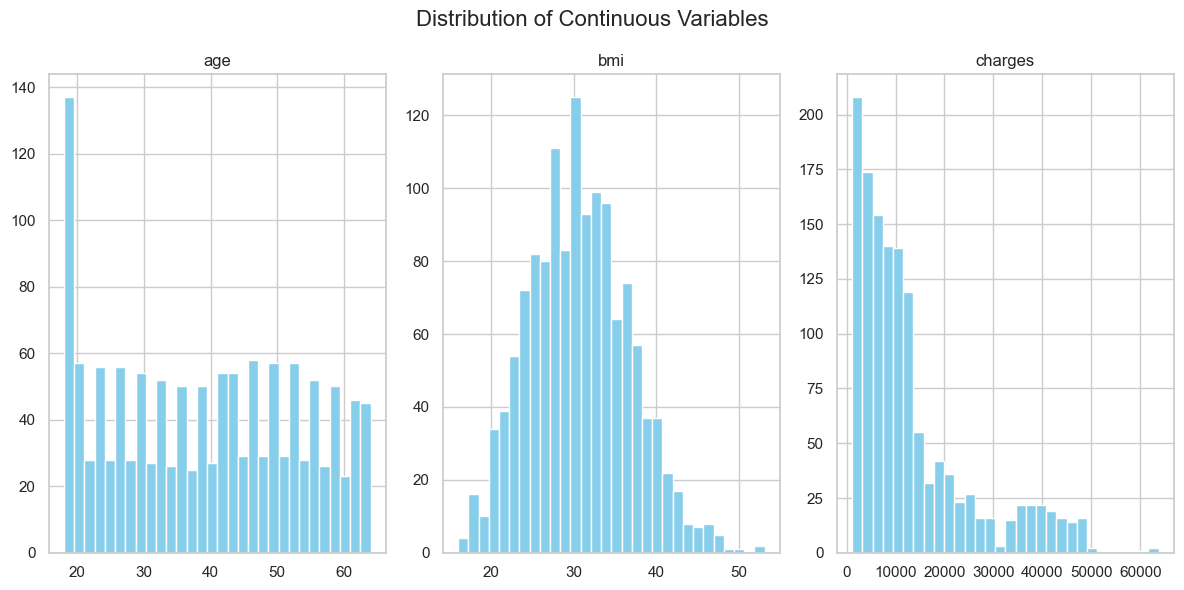

In [4]:
# Histogram for continuous variables
continuous_features = ['age', 'bmi', 'charges']
insure_df[continuous_features].hist(bins=30, figsize=(12, 6), layout=(1, 3), color='skyblue')
plt.suptitle('Distribution of Continuous Variables', fontsize=16)
plt.tight_layout()
plt.show()

3.3)  Categorical Feature Analysis (Count Plots)

C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\247164169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=insure_df, palette='Set2')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\247164169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=insure_df, palette='Set2')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\247164169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=insure_df, palette='Set2')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\247164169.py:7: FutureWarning: 

Passi

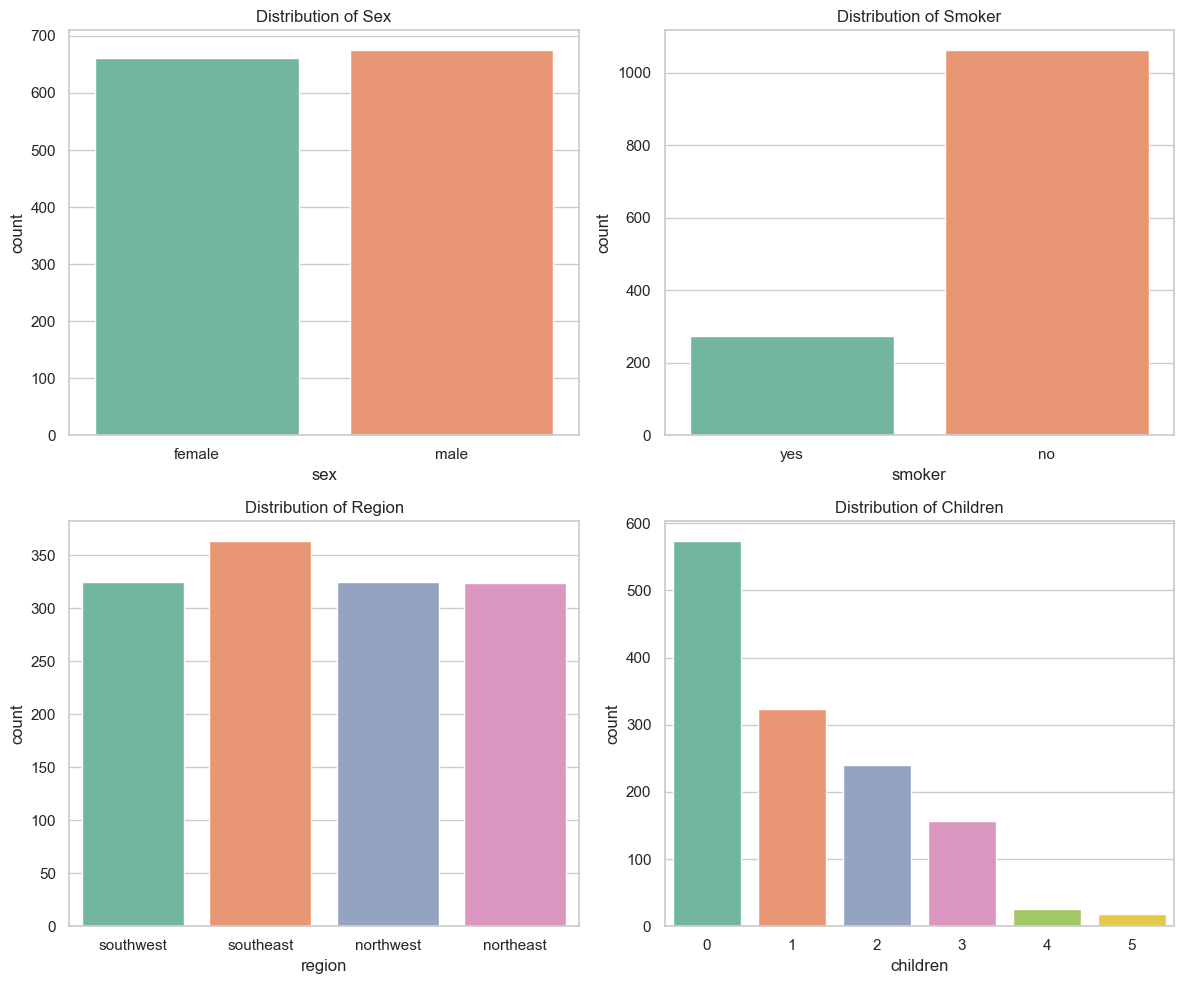

In [5]:
# Count plots for categorical features
categorical_features = ['sex', 'smoker', 'region', 'children']

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=insure_df, palette='Set2')
    plt.title(f'Distribution of {col.title()}')
plt.tight_layout()
plt.show()

3.4)  Plotting boxplots for outliers

C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\1421272053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=insure_df, palette='Set3')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\1421272053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=insure_df, palette='Set3')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\1421272053.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='charges', data=insure_df, palette='Set3')
C:\Users\ginso\AppData\Local\Temp\ipykernel_27652\14

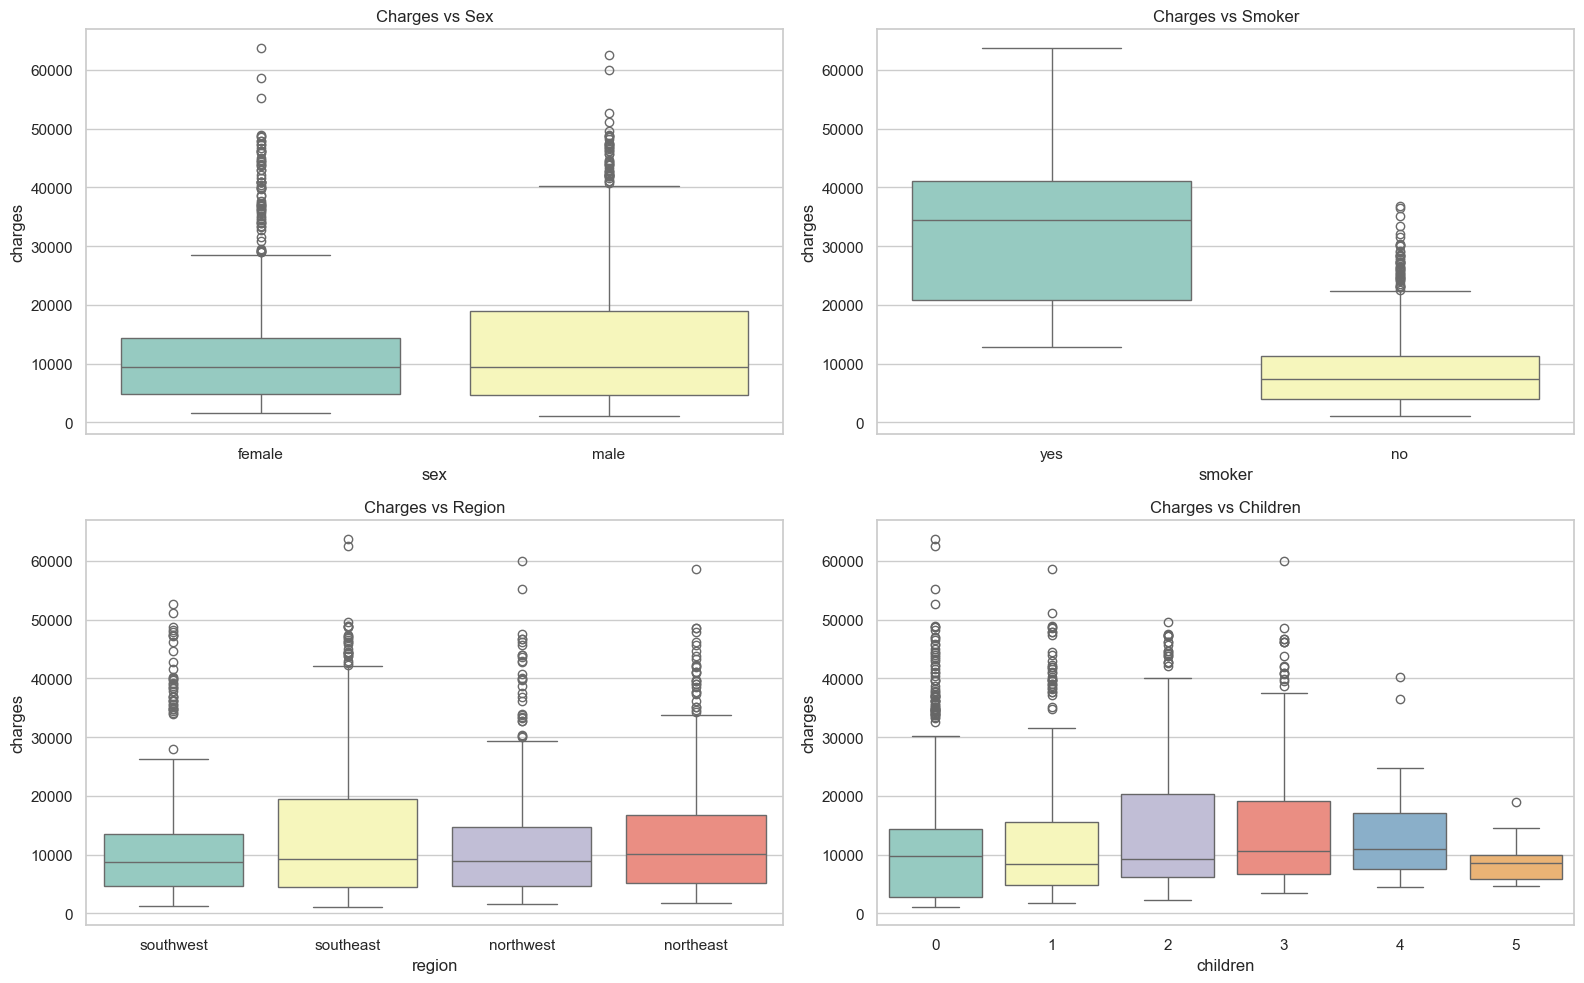

In [6]:
 
# Boxplot of target variable against categorical features
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=col, y='charges', data=insure_df, palette='Set3')
    plt.title(f'Charges vs {col.title()}')
plt.tight_layout()
plt.show()

3.5)   Outlier detection using IQR & Z-score Method

In [7]:
# Z-score method
z_scores = np.abs(stats.zscore(insure_df[['bmi', 'charges']]))
outliers_z = (z_scores > 3)
print(f"Outliers (Z-score method): {np.sum(outliers_z)}")
print("-------------------------------------------------")

# IQR method
def detect_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

outliers_iqr = detect_iqr_outliers(insure_df, 'charges')
print(f"Outliers (IQR method - Charges): {outliers_iqr.shape[0]}")

Outliers (Z-score method): bmi        4
charges    7
dtype: int64
-------------------------------------------------
Outliers (IQR method - Charges): 139


c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


3.5)Plotting the correlation matrix and heatmap

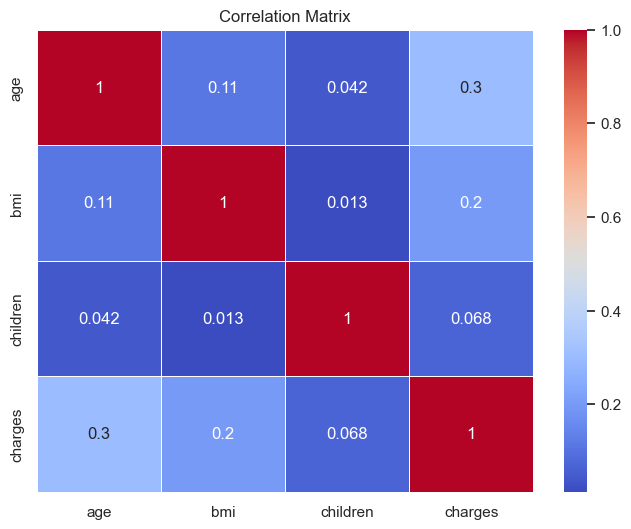

In [8]:
# Correlation matrix
corr_matrix = insure_df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

3.6)PAIRPLOT

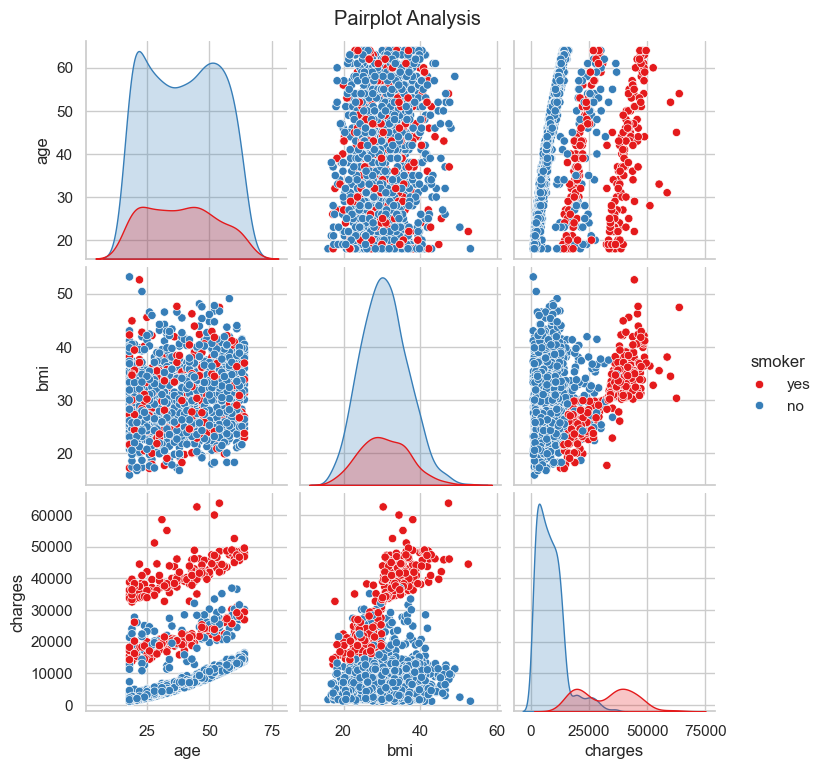

In [9]:
# Pairplot for selected features
sns.pairplot(insure_df[['age', 'bmi', 'charges', 'smoker']], hue='smoker', palette='Set1')
plt.suptitle('Pairplot Analysis', y=1.02)
plt.show()

4. DATA CLEANING AND PREPROCESSING

4.1)Import libraries necessary for preprocesing and training the models

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

4.2) SPLIT DATASET TO TRAINING, VALIDATION AND TEST SET

In [11]:
from sklearn.model_selection import train_test_split

X = insure_df.drop('charges', axis=1)
y = insure_df['charges']

# Define feature types
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']


# Split into training + temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

#Display the sets
print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

Train set: (936, 6)
Validation set: (201, 6)
Test set: (201, 6)


4.3) Creating pipelines to implement preprocessing of the data set

In [12]:
# Numeric features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical features
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Create a pipeline that combines preprocessing and modelling into one object where preprocessor does preparation of data and regressor trains using models(Linear Regression,Random forest,XGBoost,Neural network MLP) and output their evaluation metrics(MAE,MSE,RMSE,R2).

Linear Regression Model

In [13]:
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
#predict
y_pred_lr = lr_pipeline.predict(X_val)

print(" Linear Regression")
print("MAE:", mean_absolute_error(y_val, y_pred_lr))
print("MSE:", mean_squared_error(y_val, y_pred_lr))
print("RMSE:",root_mean_squared_error(y_val, y_pred_lr))
print("R²:", r2_score(y_val, y_pred_lr))
linear_r2 = r2_score(y_val, y_pred_lr)

 Linear Regression
MAE: 3930.78882392553
MSE: 30466893.44773082
RMSE: 5519.682368373276
R²: 0.7840333730095296


Random Forest Regressor

In [27]:
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

rf_params = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20]
}

rf_model = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

print(" Random Forest Regressor")
print("Best Params:", rf_model.best_params_)
print("MAE:", mean_absolute_error(y_val, y_pred_rf))
print("MSE:", mean_squared_error(y_val, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_val, y_pred_rf))
print("R²:", r2_score(y_val, y_pred_rf))
rf_r2= r2_score(y_val, y_pred_rf)

 Random Forest Regressor
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
MAE: 2619.3292122151483
MSE: 20741845.908438824
RMSE: 4554.321673799384
R²: 0.8529700277421864


XGBoost Regressor

In [28]:
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])

xgb_params = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

xgb_model = GridSearchCV(xgb_pipeline, xgb_params, cv=3, scoring='neg_mean_squared_error')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

print(" XGBoost Regressor")
print("Best Params:", xgb_model.best_params_)
print("MAE:", mean_absolute_error(y_val, y_pred_xgb))
print("MSE:", mean_squared_error(y_val, y_pred_xgb))
print("RMSE:", root_mean_squared_error(y_val, y_pred_xgb))
print("R²:", r2_score(y_val, y_pred_xgb))
xg_r2 = r2_score(y_val, y_pred_xgb)

 XGBoost Regressor
Best Params: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 300}
MAE: 2600.267411045631
MSE: 18112653.67681601
RMSE: 4255.896342348578
R²: 0.8716072340247134


MLP Regressor(Neural Network)

In [16]:
mlp_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', MLPRegressor(random_state=42, early_stopping=True, validation_fraction=0.15))
])

mlp_params = {
    'regressor__hidden_layer_sizes': [(64,64), (128,64)],
    'regressor__activation': ['relu'],
    'regressor__solver': ['adam'],
    'regressor__batch_size': [32, 64],
    'regressor__learning_rate': ['adaptive'],
    'regressor__max_iter': [200, 300]
}

mlp_model = GridSearchCV(mlp_pipeline, mlp_params, cv=3, scoring='neg_mean_squared_error')
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_val)

print("MLP Regressor")
print("Best Params:", mlp_model.best_params_)
print("MAE:", mean_absolute_error(y_val, y_pred_mlp))
print("MSE:", mean_squared_error(y_val, y_pred_mlp))
print("RMSE:", root_mean_squared_error(y_val, y_pred_mlp))
print("R²:", r2_score(y_val, y_pred_mlp))
mlp_r2 = r2_score(y_val, y_pred_mlp)

c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the opti

MLP Regressor
Best Params: {'regressor__activation': 'relu', 'regressor__batch_size': 32, 'regressor__hidden_layer_sizes': (128, 64), 'regressor__learning_rate': 'adaptive', 'regressor__max_iter': 300, 'regressor__solver': 'adam'}
MAE: 3043.4423019016585
MSE: 22867258.90934714
RMSE: 4781.972282369184
R²: 0.8379038944800159


c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


XGBoost achieved the lowest RMSE(4255.9) and highest R²(0.87), indicating it balances bias and variance well.

Random Forest performed nearly as well, but with slightly higher errors.

Linear Regression explains ~78% of variance but its higher errors indicate difficulty modeling the nonlinear relationships between features and charges.

MLP Regressor model is competitive but slightly less effective than XGBoost/Random Forest for this dataset.

XGBoost Regressor is selected for its superior accuracy and ability to handle feature interactions effectively.

The high variance and skewness in smoker charges likely challenge models like Linear Regression, which assume homoscedasticity, but have less impact on tree-based methods.



5) Model Evaluation on Test set

5.1) The best model is evaluated on the test set by outputing the evaluation metrics.

In [17]:
# Predict on test set using best XGBoost model
y_test_pred = xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = root_mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Display results
print("Test Set Evaluation Metrics")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

Test Set Evaluation Metrics
MAE:  2548.60
MSE:  19105087.78
RMSE: 4370.94
R²:   0.8740


5.2) We analyze residuals and visualize predicted vs actual values to detect patterns, outliers, or potential heteroscedasticity.

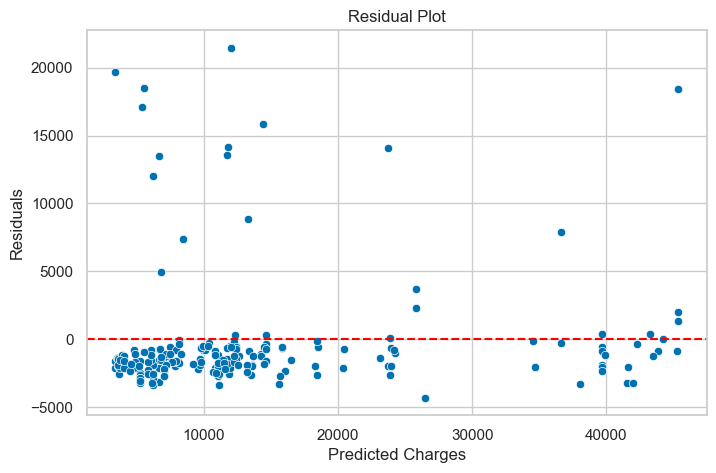

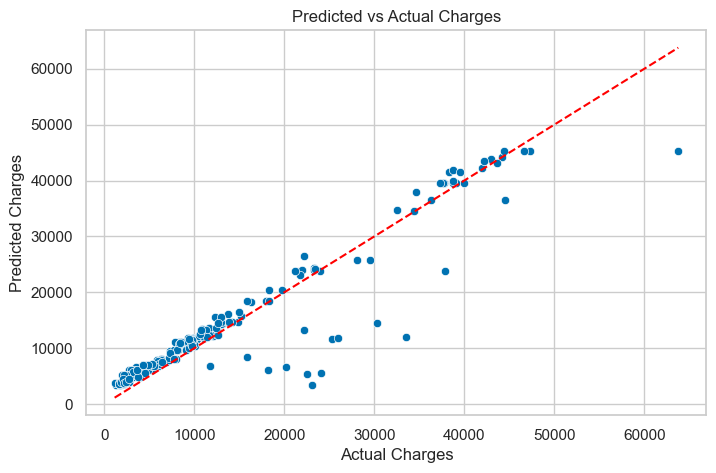

In [18]:
# Residuals
residuals = y_test - y_test_pred

# Residual Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# Predicted vs Actual Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges")
plt.grid(True)
plt.show()

5.3) We will use SHAP (SHapley Additive exPlanations) to interpret the model's predictions and understand the influence of each feature.

c:\Users\ginso\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


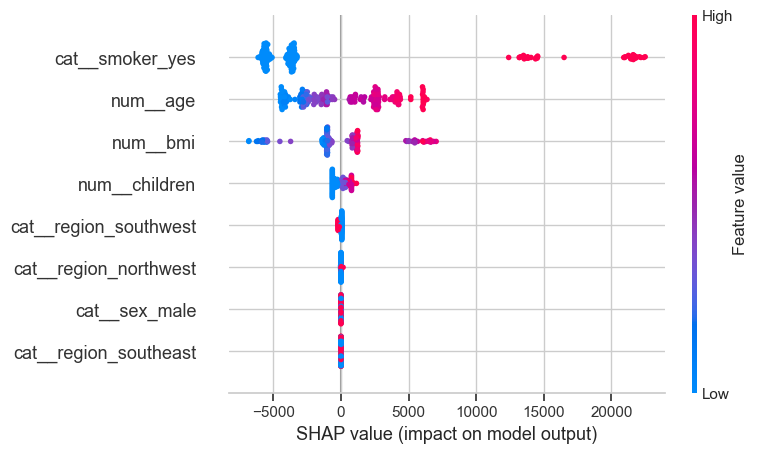

In [19]:
import shap

explainer = shap.TreeExplainer(xgb_model.best_estimator_.named_steps['regressor'])
X_test_transformed = preprocessor.transform(X_test)
shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=preprocessor.get_feature_names_out())


6) Saving the best model

In [20]:
import joblib

# Save the trained best model pipeline
joblib.dump(xgb_model.best_estimator_, 'best_insurance_model.pkl')

['best_insurance_model.pkl']

In [21]:
insure_df[1120:1300]


,age,sex,bmi,children,smoker,region,charges
1120,23,female,31.400,0,yes,southwest,34166.27300
1121,46,male,38.170,2,no,southeast,8347.16430
1122,53,female,36.860,3,yes,northwest,46661.44240
1123,27,female,32.395,1,no,northeast,18903.49141
1124,23,female,42.750,1,yes,northeast,40904.19950
...,...,...,...,...,...,...,...
1295,20,male,22.000,1,no,southwest,1964.78000
1296,18,male,26.125,0,no,northeast,1708.92575
1297,28,female,26.510,2,no,southeast,4340.44090
1298,33,male,27.455,2,no,northwest,5261.46945
